# Pypi/conda download statistics of napari plugins
This notebook visualizes download statistics of napari plugins downloaded from pypi and conda. It uses the APIs of the [napari hub](https://www.napari-hub.org/) and [pypistats](https://pypistats.org/) and [condastats](https://condastats.readthedocs.io/) (big thanks to the data providers!).

Before over-interpreting the presented data, please be aware of:
* the number of downloads is typically higher than the number of users,
* plugins that are dependencies of other plugins appear downloaded more often,
* plugins downloaded via conda and pypi may be counted differently,
* plugins that serve as python libraries also for other purposes may be overestimated in the napari-plugin context,
* plugins downloaded via automated test suites may be counted as well and
* [gamification](https://en.wikipedia.org/wiki/Gamification).

In [1]:
# conda install condastats 
# pip install pypistats

In [2]:
import pandas as pd
import urllib, json
import matplotlib.pyplot as plt
import time
import numpy as np

from condastats.cli import overall, pkg_platform, pkg_version, pkg_python, data_source
from pypistats import overall as overall_pypi

month = '2023-07'
start_date = '2023-07-01'
end_date = '2023-07-31'

In [3]:
# check which months exist on conda
p = pkg_python('devbio-napari', monthly=True)
p

pkg_name       time     pkg_python
devbio-napari  2022-04                 304
               2022-05                 391
               2022-06                 842
               2022-07                1994
               2022-08                 423
               2022-09                1583
               2022-10                 988
               2022-11                 665
               2022-12                 436
               2023-01                 271
               2023-02                 272
               2023-03                 258
               2023-04                 715
               2023-05                 257
               2023-06                 304
               2023-07                 245
Name: counts, dtype: int64

In [4]:
# check which months exist on conda
p = pkg_python('napari', monthly=True)
p

pkg_name  time     pkg_python
napari    2020-02                  39
          2020-03                 150
          2020-04                 235
          2020-05                 788
          2020-06                1012
          2020-07                 797
          2020-08                 499
          2020-09                 759
          2020-10                1346
          2020-11                 725
          2020-12                 535
          2021-01                 482
          2021-02                1036
          2021-03                2191
          2021-04                1830
          2021-05                1184
          2021-06                1528
          2021-07                1773
          2021-08                2442
          2021-09                1734
          2021-10                1746
          2021-11                1273
          2021-12                1260
          2022-01                1717
          2022-02                2201
          2022-03   

In [5]:
def get_all_plugin_data():
    url = 'https://api.napari-hub.org/plugins/index'

    json_url = urllib.request.urlopen(url) 
    data = json.loads(json_url.read()) 
    return data

def get_plugin_index():
    data = get_all_plugin_data()
    return list([x['name'] for x in data])

all_plugins = get_plugin_index()

df = pd.DataFrame({'plugin':all_plugins})

In [6]:
def add_condastats(df):
    conda_downloads = []
    for name in df['plugin']:
        name = name.lower()
        print(name)
        try:
            p = pkg_python(name, month=month)
            num_downloads = p[0]
        except:
            print("Error")
            num_downloads = np.nan
        conda_downloads.append(num_downloads)

    df['conda_downloads'] = conda_downloads

add_condastats(df)

napari-bud-cell-segmenter
Error
napari-nibabel
Error
napari-molecule-reader
napari-obj
Error
napari-deepspot
napari-hello
Error
napari-sim-processor
napari-filaments
napari-plugin-search
napari-clusters-plotter
napari-vesicles-segmentation
napari-math
napari-crop
napari-nd2-folder-viewer
napari-allencell-annotator
mikro-napari
Error
vollseg-napari
napari-dexp
napari-ndev
Error
napari-aphid
Error
napari-segment-blobs-and-things-with-membranes
napari-svetlana
Error
napari-curtain
msi-explorer
Error
blik
napari-aideveloper
Error
napari-animated-gif-io
napari-psf-analysis
natari
napari-generic-simulator
napari-feature-classifier
napari-spatialdata
napari-imc
napari-organoid-counter
Error
napari-assistant
world2data
napari-pram
napari-n2v
Error
napari-hierarchical
Error
napari-simpleitk-image-processing
napari-cellseg3d
napari-mrcfile-handler
napari-validate-random-label-predictions
Error
napari-console
iacs-ipac-reader
napari-imagej
Error
empanada-napari
Error
the-segmentation-game
napari-

In [7]:
df

,plugin,conda_downloads
0,napari-bud-cell-segmenter,NaN
1,napari-nibabel,NaN
2,napari-molecule-reader,18.0
3,napari-obj,NaN
4,napari-DeepSpot,12.0
5,napari-hello,NaN
6,napari-sim-processor,16.0
7,napari-filaments,14.0
8,napari-plugin-search,114.0
9,napari-clusters-plotter,53.0


In [8]:
def add_pypistats(df):
    pypi_downloads = []
    for name in df['plugin']:
        print(name)
        try:
            time.sleep(5)
            o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)
            without_mirrors = o[o['category']  == 'without_mirrors']
            num_downloads = without_mirrors['downloads'].sum()
        except:
            print("Error")
            num_downloads = np.nan
        pypi_downloads.append(num_downloads)

    df['pypi_downloads'] = pypi_downloads

add_pypistats(df)

napari-bud-cell-segmenter
napari-nibabel
napari-molecule-reader
napari-obj
napari-DeepSpot
napari-hello
napari-sim-processor
napari-filaments
napari-plugin-search
napari-clusters-plotter
napari-vesicles-segmentation
napari-math
napari-crop
napari-nd2-folder-viewer
napari-allencell-annotator
mikro-napari
vollseg-napari
napari-dexp
napari-ndev
napari-aphid
napari-segment-blobs-and-things-with-membranes
napari-svetlana
napari-curtain
MSI-Explorer


C:\Users\haase\AppData\Local\Temp\ipykernel_4432\2625326076.py:7: UserWarning: Requested start date (2023-07-01) is before earliest available data (2023-07-20), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


blik
napari-aideveloper
napari-animated-gif-io
napari-psf-analysis
natari
napari-generic-SIMulator
napari-feature-classifier
napari-spatialdata
napari-imc
napari-organoid-counter
napari-assistant
World2Data
napari-pram
napari-n2v
napari-hierarchical
napari-simpleitk-image-processing
napari-cellseg3d
napari-mrcfile-handler
napari-validate-random-label-predictions
napari-console
iacs-ipac-reader
napari-imagej
empanada-napari
the-segmentation-game
napari-pdr-reader
napari-IDS
napari-affinities
napari-omaas
napari-brushsettings
waver
napari-workflow-inspector
beetlesafari
napari-annotator
napari-czifile2
napari-ehooke
napari-bioimageio
napari-splinedist
napari-layer-table
napari-wsi
napari-itk-io
napari-power-spectrum
vessel-express-napari
morphometrics-engine
napari-vedo-bridge


C:\Users\haase\AppData\Local\Temp\ipykernel_4432\2625326076.py:7: UserWarning: Requested start date (2023-07-01) is before earliest available data (2023-07-03), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-turing
Partial-Aligner
napari-stress
napari-quoll
napari-apple
napari-stable-diffusion
napari-yolov5
napari-labelling-assistant
napari-checkerboard
napari-imsmicrolink
napari-brainbow-diagnose
napari-power-widgets
napari-nasa-samples
napari-roi-registration
napari-folder-browser
napari-live-recording
napari-dvid
napari-annotatorj
napari-caphid


C:\Users\haase\AppData\Local\Temp\ipykernel_4432\2625326076.py:7: UserWarning: Requested start date (2023-07-01) is before earliest available data (2023-07-30), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-process-points-and-surfaces
napari-clipboard
Error
pycudadecon
napari-cell-centroid-annotator
napari-seedseg
eats-worm
napari-em-reader
recOrder-napari
napari-labelimg4classification
napari-roi
PartSeg-smfish
napari-tomoslice
napari-cryoet-data-portal
Error
napari-labeling
napari-time-slicer
napari-indices
napari-qrcode
napari-arboretum
napari-sam
napari-features
allencell-ml-segmenter
napari-micromanager
napari-mri
napari-medical-image-formats
napari-rioxarray
napari-script-editor
napari-spacetx-explorer
napari-graph
napari-PHILOW
napari-sc3D-viewer
napari-bigfish
nucleaizer-backend
hesperos
napari-tiler
faser
napari-layer-details-display
napari-meshio
napari-figure
napari-locpix
napari-labels-overlap
napari-annotate
napari-large-image-importer
napari-patchcreator
napari-labelprop
napari-mat-images
napari-result-stack
napari-nanopyx
brainreg-napari
napari-PICASSO
psfmodels
zarr-tools
misic-napari
napari-bfio
Error
napari-multitask
napari-tracks-reader
napari-boids
napari-stl-ex

C:\Users\haase\AppData\Local\Temp\ipykernel_4432\2625326076.py:7: UserWarning: Requested start date (2023-07-01) is before earliest available data (2023-07-05), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-nd-cropper
cellpose-napari
palmari
napari-serialcellpose
napari-pystackreg
napari-elementary-numpy-operations
napari-wsireg
napari-umap
napari-steinpose
napari-dzi-zarr
napari-pixel-correction
cellfinder-napari
napari-tissuumaps
napari-file-watcher
napari-tabu
RedLionfish
napari-SAM4IS
napari-IP-workflow
nfinder
napari-geojson
napari-J
napari-amdtrk
napari-plot-profile
napari-clemreg
anchor-droplet-chip
napari-tiledb-bioimg
PlatyMatch
in-silico-fate-mapping
napari-boardgame-maker
Error
snouty-viewer
napari-properties-plotter
avidaq
brainglobe-napari-io
napari-lattice
napari-gruvbox
napari-video-cvdask
bfio
napari-imaris-loader
napari-chatgpt
napari-sif-reader
morphospaces
napari-apr-viewer
guanine-crystal-analysis
napari-spatial-omics
brainreg-segment
napari-flim-phasor-plotter
Error
napari-bacseg
napari-nD-annotator
napari-blob-detection
napari-time-series-plotter
napari-cupy-image-processing
napari-LF
napari-correct-drift
napari-bbox
napari_video
napari-brainways
napari-strack

C:\Users\haase\AppData\Local\Temp\ipykernel_4432\2625326076.py:7: UserWarning: Requested start date (2023-07-01) is before earliest available data (2023-07-07), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-denoiseg
napari-help
vollseg-napari-mtrack
napari-pymeshlab
napari-nucleaizer
napari-pssr
napari-error-reporter
grabber-ift
workshop-demo
napari-brightness-contrast
disease-classifier
napari-zulip
morphometrics
napari-nikon-nd2
napari-cookiecut
napari-svg
Large-Image-Viewer
Error
napari-subboxer
napari-proofread-brainbow
napari-trait2d
napari-text-layer
napari-conidie
napari-merge-stardist-masks
Label-Creator
napari-aicsimageio
napari-dv
PartSeg
napari-deepfinder
napari-filament-annotator
imaxt-multiscale-plugin
napari-h5
Error
napari-napari
napari-label-interpolator
napari-segment-anything
napari-EMD
Error
napari-tracing
napari-pyclesperanto-assistant
napari-plot
napari-tomotwin
elastix-napari
napari-nifti
napari-assistant-plugin-generator
napari-deeplabcut
napari-bio-sample-data
affinder
napari-shape-odyssey
Error
koopa-viz
smo
ilastik-napari
napari-features-selector
napari-live-flim
napari-solarized
napari-yapic-prediction
napari-czann-segment
yt-napari
napari-workflow-optimi

C:\Users\haase\AppData\Local\Temp\ipykernel_4432\2625326076.py:7: UserWarning: Requested start date (2023-07-01) is before earliest available data (2023-07-09), because data is only available for 180 days. See https://pypistats.org/about#data
  o = overall_pypi(name, format='pandas', total=False, start_date=start_date, end_date=end_date)


napari-ISM
napari-lazy-openslide
Image-Composer
zarpaint
napari-boxmanager
vollseg-napari-trackmate
napari-splineit
okapi-em
stardist-napari
napari-geoscience-viewer
epitools
napari-skimage-regionprops
spots-in-yeasts
Error
napari-mm3
tootapari
napari-owncloud
napari-properties-viewer


In [9]:
# df

In [10]:
df.to_csv("stats_" + month + ".csv")

In [11]:
def remove_nans_and_shipped_with_napari_plugins(df):
    # remove plugins that are part of the napari distribution
    remove_plugins = ["napari-console", "napari-svg"]
    df = df[[x not in remove_plugins for x in df['plugin']]]

    # remove nans
    df = df.dropna()
    
    return df

df = remove_nans_and_shipped_with_napari_plugins(df)

In [12]:
df = df.sort_values('conda_downloads', ascending=False)

In [13]:
df

,plugin,conda_downloads,pypi_downloads
290,devbio-napari,245.0,324.0
101,napari-time-slicer,194.0,959.0
34,napari-assistant,159.0,953.0
246,PartSeg,149.0,614.0
57,napari-czifile2,143.0,100.0
54,napari-workflow-inspector,142.0,231.0
340,napari-skimage-regionprops,138.0,1215.0
229,napari-brightness-contrast,133.0,100.0
47,the-segmentation-game,130.0,62.0
179,napari-plot-profile,124.0,100.0


In [14]:
# reindex to make the plotting work
df = pd.DataFrame(df.to_dict(orient='list'))

## condastats

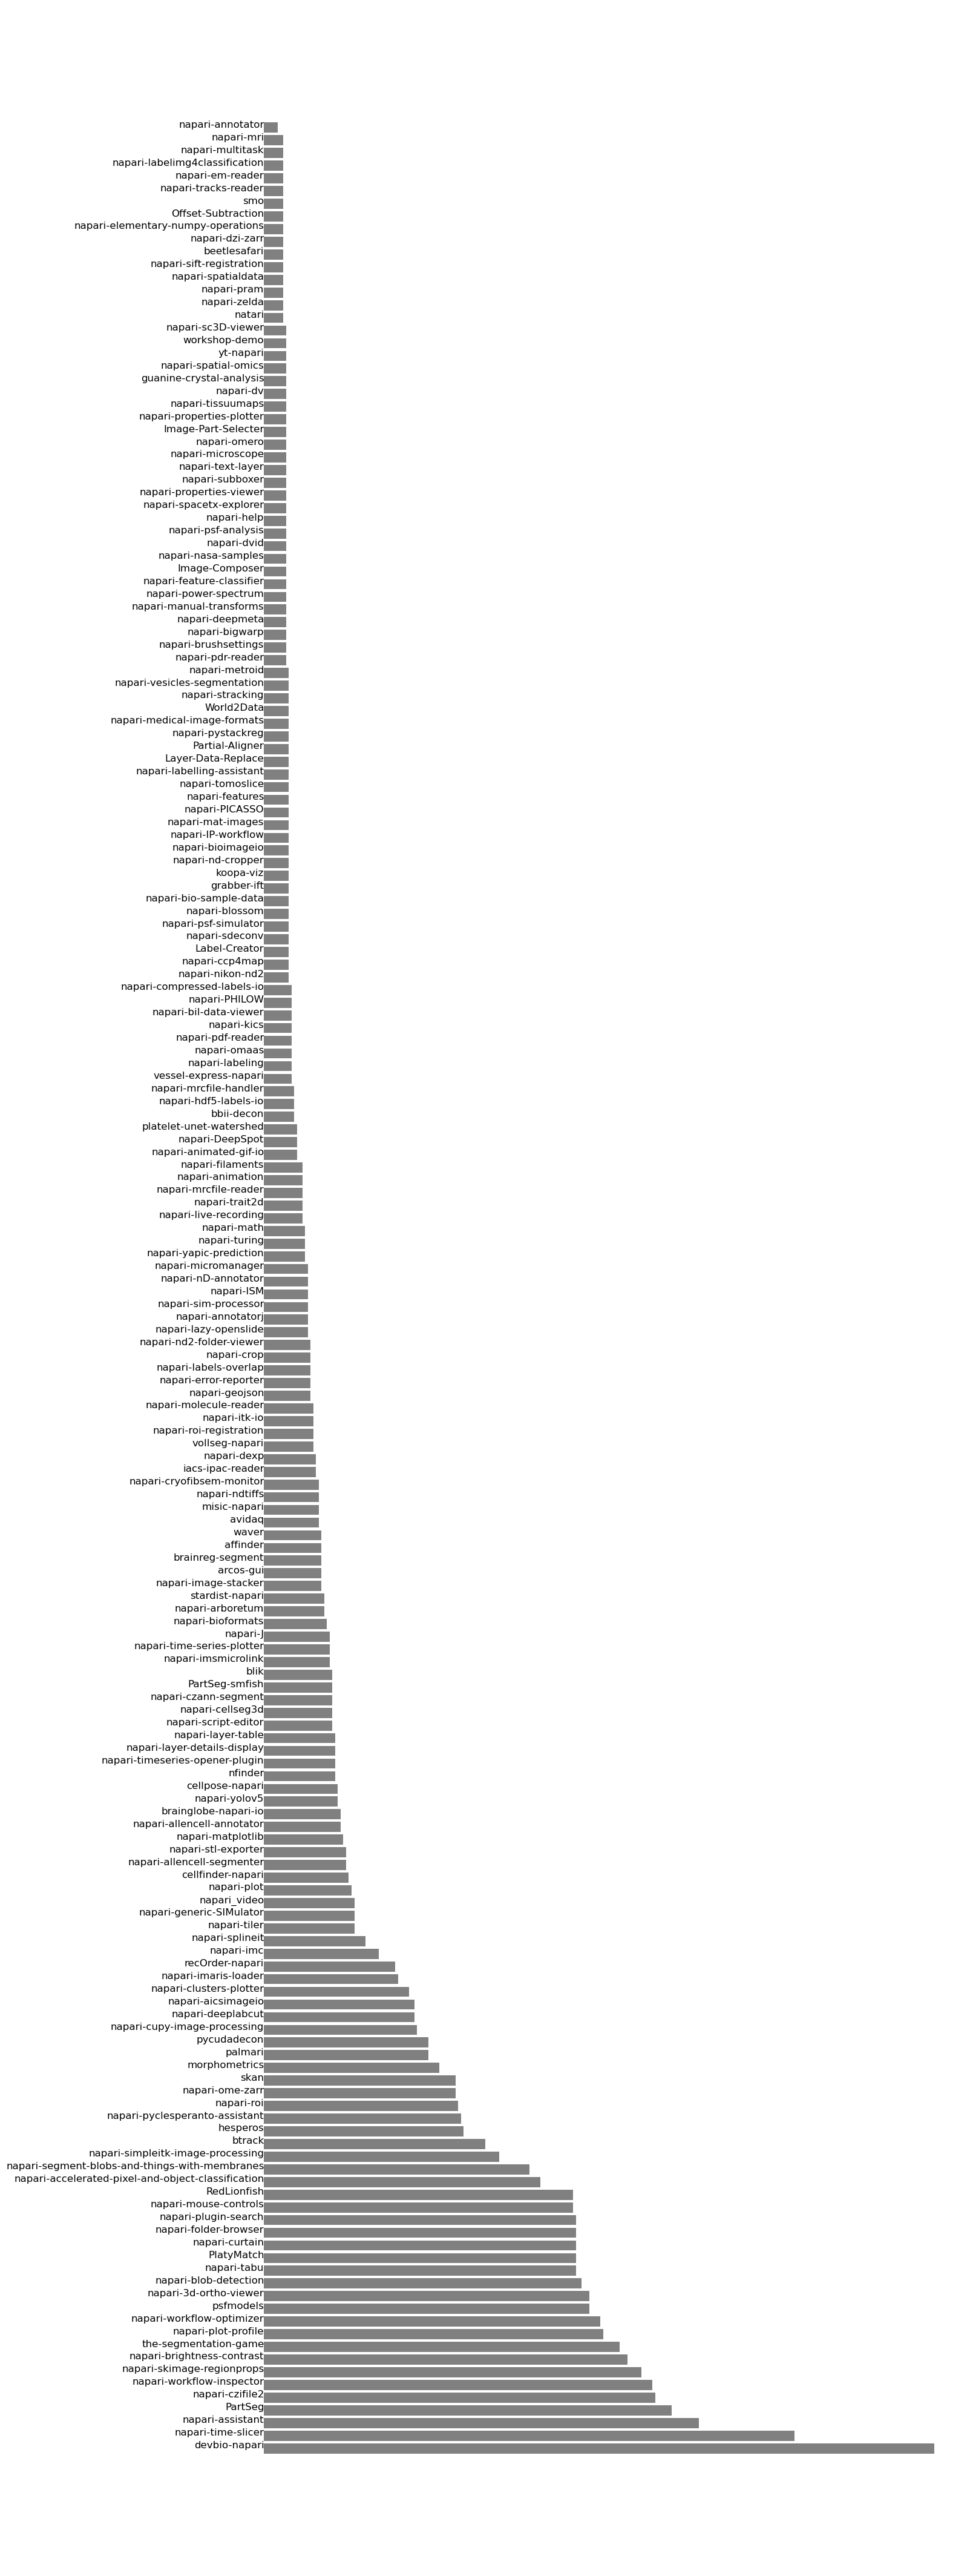

In [15]:
def plot_data(df, column='conda_downloads', width=15,height=55):
    f, ax = plt.subplots(1,1,figsize=(width,height))
    # ax = plt.subplot(111, fig_size=(15, 15))
    #df[column].plot(ax=ax, kind='barh', title='ranking')
    ax.axis('off')
    for i, x in enumerate(df['plugin']):
        plt.barh(i, df[column][i], color = 'grey')
        ax.text(0, i, x, ha='right', fontsize='large')
        
plot_data(df)

## condastats vs. pypistats

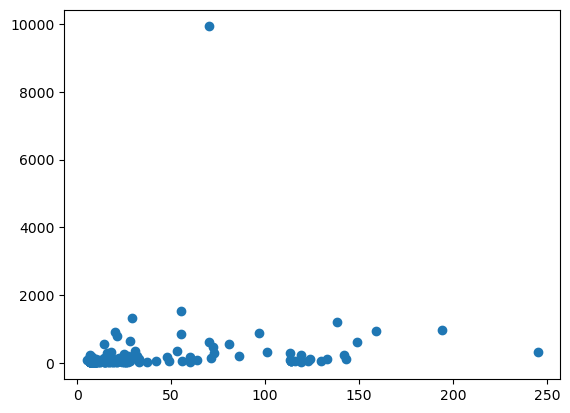

In [16]:
plt.scatter(df['conda_downloads'], df['pypi_downloads'])

## pypistats

In [17]:
# reload the data because we removed entries with NaNs in the pypi column earlier
df = pd.read_csv("stats_" + month + ".csv")
df = df[["plugin", "pypi_downloads"]]

df = remove_nans_and_shipped_with_napari_plugins(df)

In [18]:
df = df.sort_values('pypi_downloads', ascending=False)
df

,plugin,pypi_downloads
286,skan,9927.0
193,bfio,1662.0
262,napari-deeplabcut,1541.0
302,napari-matplotlib,1322.0
340,napari-skimage-regionprops,1215.0
334,vollseg-napari-trackmate,1165.0
101,napari-time-slicer,959.0
34,napari-assistant,953.0
144,napari-ndtiffs,912.0
20,napari-segment-blobs-and-things-with-membranes,894.0


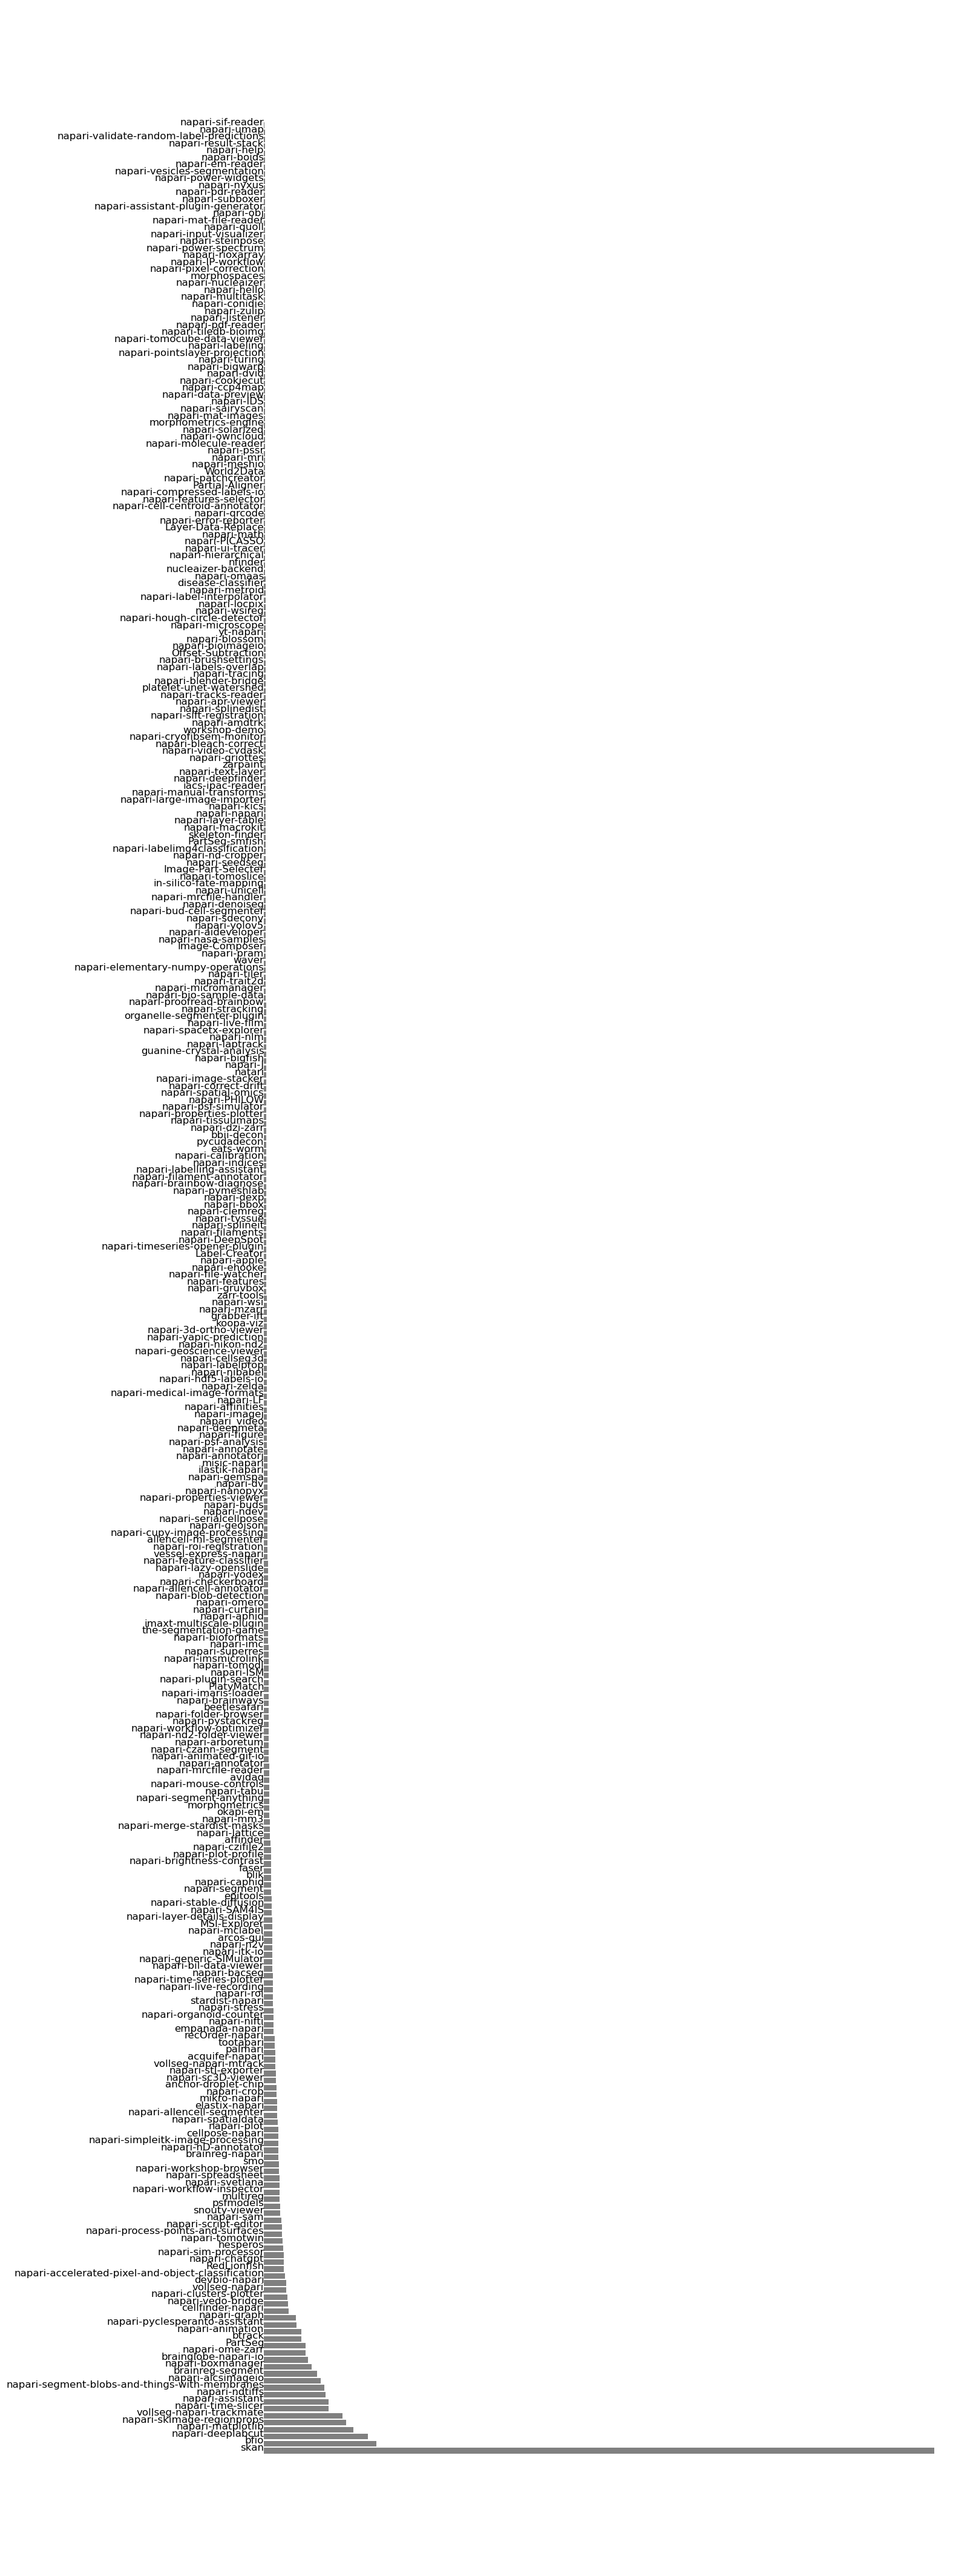

In [19]:
# reindex to make the plotting work
df = pd.DataFrame(df.to_dict(orient='list'))

plot_data(df, column='pypi_downloads')